# **Logistic Regression from Scratch**

 ( I used a single feature 'Age' to predict the target value 'Purchased' )

In [292]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

# Loading the Dataset
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [293]:
# Splitting the Dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size= 0.30)

In [294]:
# Creating the logistic model

# Predictions
def prediction(X, b0, b1):
   return np.array([1 / (1 + exp(-b0 - b1*x)) for x in X])

# Function to train Model
def log_regression(X,Y):

   # Initiation of Variables
   b0 = 0
   b1 = 0
   L = 0.001
   epochs = 400

   for i in range(epochs):
      y_pred = prediction(X, b0, b1)
      del_b0 = sum((y_pred - Y)*y_pred*(1-y_pred))
      del_b1 = sum((y_pred - Y)*y_pred*(1-y_pred)*X)
      # Updating the features
      b0 = b0 - L*del_b0
      b1 = b1 - L*del_b1

   return b0, b1

### **Using Raw Data**

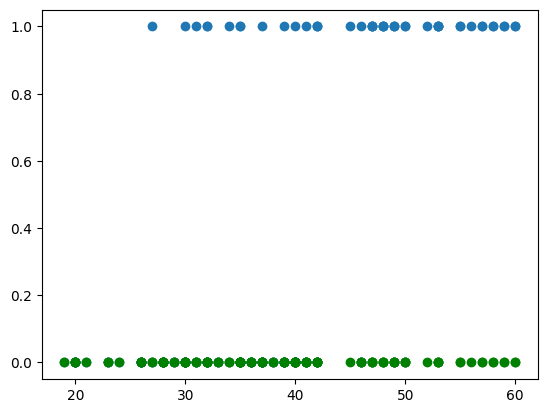

Accuracy = 0.6166666666666667


In [295]:
# Raw data : X = X_train

# Training the nodel
b0, b1 = log_regression(X_train, y_train)

# Final Predictions
y_pred = prediction(X_test, b0, b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='green')
plt.show()

# Accuracy of Model
accuracy = 0
for i in range(len(y_pred)):
   if y_pred[i] == y_test.iloc[i]:
      accuracy += 1

print("Accuracy = {}".format(accuracy/len(y_pred)))

### **Using Normalisation**

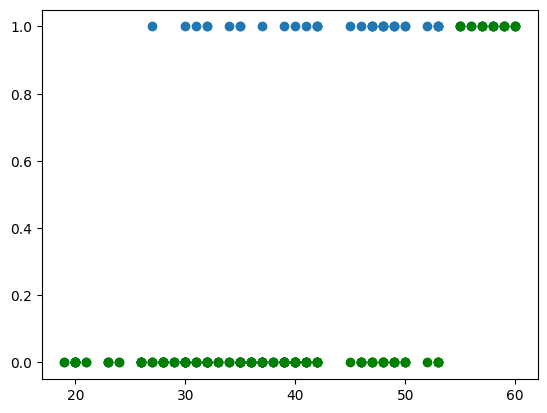

Accuracy = 0.7083333333333334


In [296]:
# Normalization
def normalize(X):
  X = (X - min(X))/(max(X) - min(X))
  return X

# Training the nodel
b0, b1 = log_regression(normalize(X_train), y_train)

# Final Predictions
y_pred = prediction(normalize(X_test), b0, b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='green')
plt.show()

# Accuracy of Model
accuracy = 0
for i in range(len(y_pred)):
   if y_pred[i] == y_test.iloc[i]:
      accuracy += 1

print("Accuracy = {}".format(accuracy/len(y_pred)))

### **Using Standardisation**

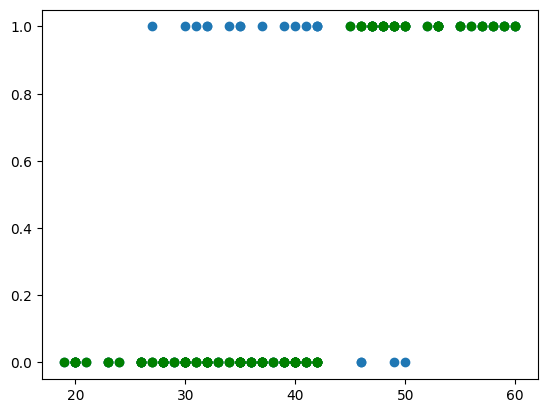

Accuracy = 0.8416666666666667


In [297]:
# Standardization
def standardize(X):
   X = (X - np.mean(X))/ np.std(X)
   return X

# Training the nodel
b0, b1 = log_regression(standardize(X_train), y_train)

# Final Predictions
y_pred = prediction(standardize(X_test), b0, b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='green')
plt.show()

# Accuracy of Model
accuracy = 0
for i in range(len(y_pred)):
   if y_pred[i] == y_test.iloc[i]:
      accuracy += 1

print("Accuracy = {}".format(accuracy/len(y_pred)))

# **Logistic Regression Using Sklearn**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


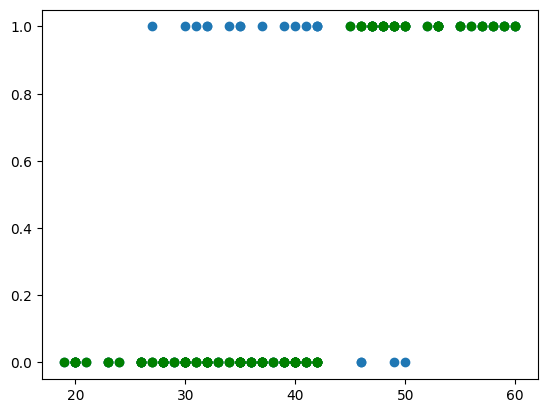

Accuracy = 0.8416666666666667


In [298]:
from sklearn.linear_model import LogisticRegression

# Creating Model
Log_model = LogisticRegression()
Log_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Predicting Results
y_pred_sk = Log_model.predict(X_test.values.reshape(-1,1))

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c='green')
plt.show()

# Accuracy
print("Accuracy = {}".format(Log_model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))))

# **Implementing KNN from Scratch**

In [299]:
# Loading the Dataset
iris = pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 0.98, 'Pair plot of the Dataset')

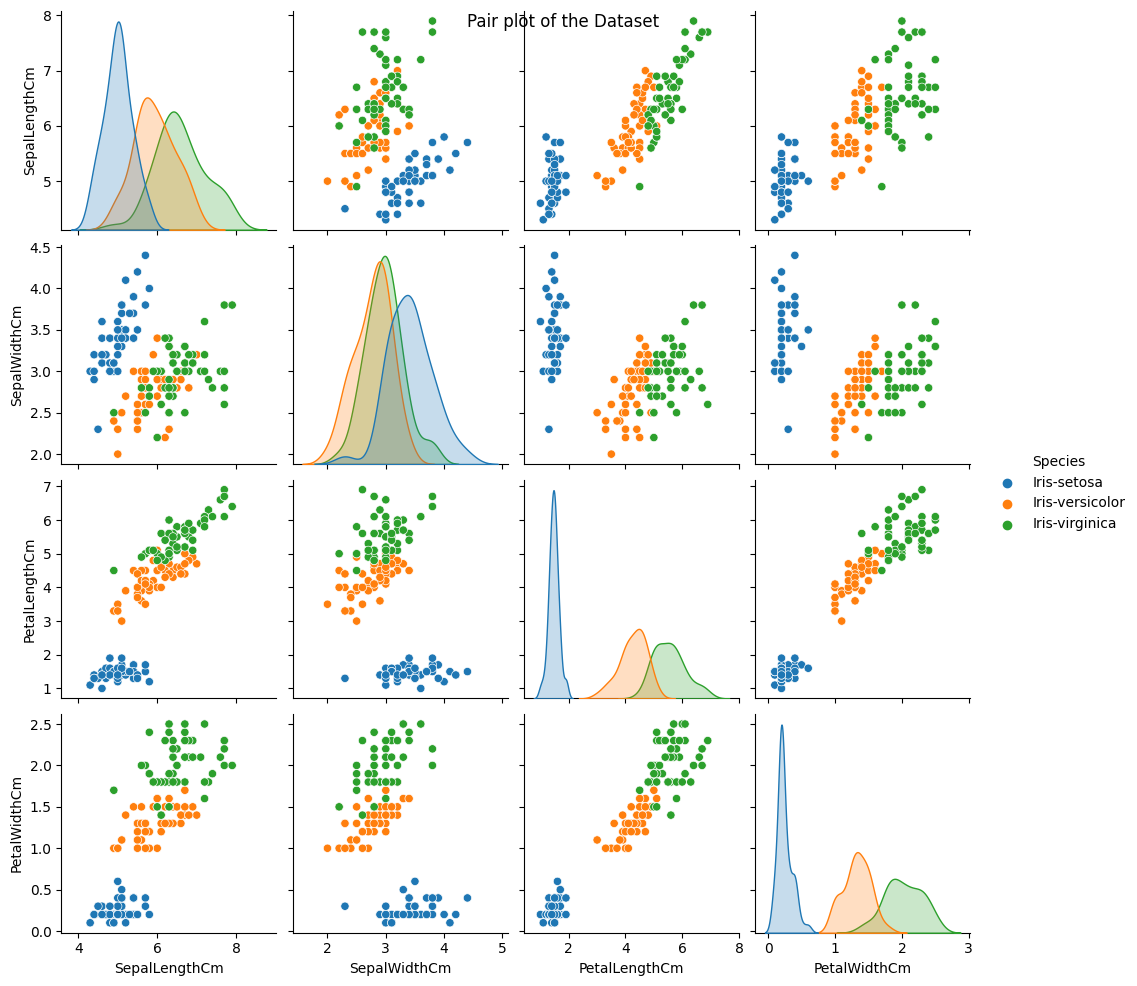

In [300]:
# Plot of dataset
import seaborn as sns
plot = sns.pairplot(iris.drop('Id', axis = 1), hue = 'Species')
plot.fig.suptitle('Pair plot of the Dataset')

In [301]:
# Slpitting into X & Y
x = iris.iloc[:, 1:5]
target = iris.iloc[:, -1]
y = np.zeros(len(target), dtype = int)
for i in range(len(target)):
    if target.iloc[i] == 'Iris-setosa':
       y[i] = 0
    elif target.iloc[i] == 'Iris-versicolor':
       y[i] = 1
    else:
       y[i] = 2

In [302]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [303]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Normalize the dataset
from sklearn.preprocessing import Normalizer
scale = Normalizer().fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [305]:
# Implemnting KNN Algorithm

# Euclidean Distance
def Euclidean(x_train, test_point):

    distances = []
    for i in range(len(x_train)):
        current_train_point = x_train[i]
        current_distance = 0

        for j in range(len(current_train_point)):
            current_distance += (current_train_point[j] - test_point[j])**2

        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)

    distances = pd.DataFrame({'distance':distances})
    return distances

In [306]:
# Nearest Neighbours
def nearest_neighbours(distances, K):
    df_nearest = distances.sort_values(by=['distance'], axis=0)
    df_nearest = df_nearest[:K]
    return df_nearest

# Classifying class from nearest neighbours
from collections import Counter
def classification(df_nearest, y_train):
    counter_vote = Counter(y_train[df_nearest.index])
    y_pred = counter_vote.most_common()[0][0]
    return y_pred

In [307]:
# The Final Algorithm
def KNN_scratch(x_train, y_train, x_test, K):
    y_pred = []

    for test_point in x_test:
        distances = Euclidean(x_train, test_point)
        df_nearest = nearest_neighbours(distances, K)
        y_pred_point = classification(df_nearest, y_train)
        y_pred.append(y_pred_point)

    return y_pred

<function matplotlib.pyplot.show(close=None, block=None)>

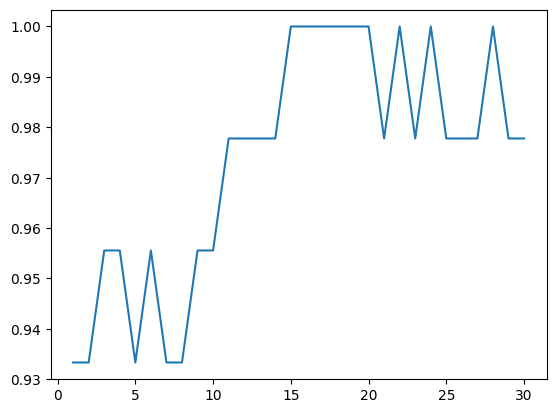

In [312]:
# Testing the Model
K =  1
# Accuracy in Validation
from sklearn.metrics import accuracy_score
accuracy = []
while K<=30:
     y_pred_scratch = KNN_scratch(x_train, y_train, x_test, K)
     accuracy.append(accuracy_score(y_test, y_pred_scratch))
     K +=1

# Plot of accuracy vs K Value
K_value = np.arange(30) + 1
plt.plot(K_value, accuracy)
plt.show

In [313]:
# Most Suitable K
K = accuracy.index(max(accuracy)) + 1
print(K)

15


# **Implementation of KNN using Sklearn**

In [314]:
from sklearn.neighbors import KNeighborsClassifier
knn_sk = KNeighborsClassifier(K)
knn_sk.fit(x_train, y_train)
y_pred_sklearn = knn_sk.predict(x_test)
print(y_pred_sklearn)

[1 0 1 0 0 1 1 0 0 2 0 1 1 0 1 2 2 2 0 2 1 0 2 0 1 2 0 1 1 2 2 1 0 0 2 2 0
 0 0 2 1 1 2 1 0]


In [315]:
# Comparing result of sklearn with scratch
y_pred_scratch = KNN_scratch(x_train, y_train, x_test, K)
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True
